In [1]:
"""
getting zippped data file from URL
"""

!wget https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip
    

--2021-04-08 09:28:53--  https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pan6mutc5xj5kj0/trainPart1.zip [following]
--2021-04-08 09:28:53--  https://www.dropbox.com/s/raw/pan6mutc5xj5kj0/trainPart1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc13af2a0a296634cf59e3875d8a.dl.dropboxusercontent.com/cd/0/inline/BMPffOpoGXVjJwtHO1ayuQsrSja7QlTKcDK6pb_lQ3wbUxZbGttqcWZ5Wq51QWgmGIYSeJpCpdkjv8vlSJCA7sLCigwaEwkwn4pIN7tuoq4BdF09oTqutiCFUOFWtKW7LFvL32OkcSEoA55TZEmhG7iS/file# [following]
--2021-04-08 09:28:53--  https://uc13af2a0a296634cf59e3875d8a.dl.dropboxusercontent.com/cd/0/inline/BMPffOpoGXVjJwtHO1ayuQsrSja7QlTKcDK6pb_lQ3wbUxZbGttqcWZ5Wq51QWgmGIYSeJpCpdkjv8vlS

In [ ]:
!unzip trainPart1.zip

"""
Unzipping downloded file
"""

In [3]:
"""
chaning our working directory to "train",
Next step will be to rename existing file of 0-9 digits and removing rest of the dataset(a-z,A-Z)

"""

import os
os.chdir('/content/train')



In [4]:
"""
renaming files which contrains dataset for this subtask.
(0-9 only)
"""

for i in range(1,11):
  if i<10:
    path='Sample00'+str(i)
    os.rename(path, str(i-1))
  if i==10:
    path='Sample0'+str(i)
    os.rename(path, str(i-1))

In [5]:
"""
this module helps you in copying and removal of files and directories 
"""
import shutil

In [6]:
for i in range(11,63):
    path='Sample0'+str(i)
    shutil.rmtree(path)  #removing directory at this path


In [7]:
"""
Impoting all neccessory modules for model building, compiling and training
"""

import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from keras.preprocessing.image import ImageDataGenerator



### Model Building

In this case we have to train on images of 0-9 digits and which is kind of less classes than the last time.
It's very obvious that we have small dataset but from last learnings i'm sure that i can build a descent model 
using this dataset


This time the architecture is pretty much same as of the last time, in this model architecture creating a symmetry of last model(subtask 1)  was my first thought, secondary i thought to have more convolutional layers with more connections in exiting connections. 

So picking my first thought seems to be right choice as last time i got accurary above 90%.  
Target is to achieve a descent accuracy this time as well(95%+ is descent. isn't?).   


This architecture is inspired by a parallel and series resistance.

In [8]:
def MiDasNet():
  """
  As we have connections so working with Sequencial Model is not feasibile.
  Hence in this model i'll be using keras Functional API(helps in creating flexible models)

  """
  input=keras.Input(shape=(28,28,1)) #input shape this time is 28*28
  input_2=layers.Conv2D(64,3,kernel_initializer='HeNormal',activation='relu',padding='same')(input)# passing input to this conv2d layer
  input_2=layers.MaxPooling2D(2,2)(input_2) #applying max pooling
  input_3=layers.Conv2D(64,3,padding='same',kernel_initializer='HeNormal',activation='relu')(input_2) #passing input_2 to this conv2d layer


  """
  Now this input_3 will  be used by three layers layer_1,layer_2,layer_3 for leanring more complex features,
  Keep in mind that we are using this with kernal_regularizer.
  """

  layer_1=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_3)#connection from input_3 layer to layer_1
  layer_1=layers.BatchNormalization()(layer_1)
  layer_1=layers.MaxPooling2D(2,2)(layer_1)
  layer_1=layers.Dropout(0.3)(layer_1)

  layer_2=layers.Conv2D(32,1,kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2',padding='same')(input_3)#connection from input_3 layer to layer_2
  layer_2=layers.BatchNormalization()(layer_2)
  layer_2=layers.MaxPooling2D((2,2))(layer_2)
  layer_2=layers.Dropout(0.3)(layer_2)


  """
  Padding here is 'same' for keeping dimentions be equal at ending point of connection.
  """

  layer_3=layers.Conv2D(32,1,kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2',padding='same')(input_3)#connection from input_3 layer to layer_3
  layer_3=layers.BatchNormalization()(layer_3)
  layer_3=layers.MaxPooling2D((2,2))(layer_3)
  layer_3=layers.Dropout(0.3)(layer_3)


  """
  As we have layer_1, layer_2, layer_3 with same output dimention, we can use Add for adding these tensors.
  """

  sum_out=layers.add([layer_1,layer_2,layer_3])
    
  """
  Passing this sum_out layer to a conv2d layers for learning more complex features
  """

  input_2_2=layers.Conv2D(64,3,padding='same',kernel_initializer='HeNormal',activation='relu')(sum_out) 
  input_2_2=layers.MaxPooling2D(2,2)(input_2_2)
  input_2_2=layers.Conv2D(64,3,padding='same',kernel_initializer='HeNormal',activation='relu')(input_2_2)


  """
  Now this input_2_2 will  be used by three layers layer_1_1,layer_2_2,layer_3_3 for leanring more complex features,
  Keep in mind that we are using this with kernal_regularizer.
  """
    
    
  layer_1_1=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_2_2) # input from input_2_2 to layer_1_1
  layer_1_1=layers.BatchNormalization()(layer_1_1)
  layer_1_1=layers.MaxPooling2D(2,2)(layer_1_1)
  layer_1_1=layers.Dropout(0.3)(layer_1_1)

  layer_2_2=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_2_2) # input from input_2_2 to layer_2_2
  layer_2_2=layers.BatchNormalization()(layer_2_2)
  layer_2_2=layers.MaxPooling2D((2,2))(layer_2_2)
  layer_2_2=layers.Dropout(0.3)(layer_2_2)
    
  """
  Padding here is 'same' for keeping dimentions be equal at ending point of connection.
  """

  layer_3_3=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_2_2) # input from input_2_2 to layer_3_3
  layer_3_3=layers.BatchNormalization()(layer_3_3)
  layer_3_3=layers.MaxPooling2D((2,2))(layer_3_3)
  layer_3_3=layers.Dropout(0.3)(layer_3_3)

  """
  As we have layer_1_1, layer_2_2, layer_3_3 with same output dimention, we can use Add for adding these tensors.
  """
  sum_out_2=layers.add([layer_1_1,layer_2_2,layer_3_3])


  sum_out_2=layers.GlobalMaxPool2D()(sum_out_2)  #performing global maximum

  sum_out_2=layers.Flatten()(sum_out_2)# flattens sum_out_2 tensor to 1d tensor 
  out=layers.Dense(10,'softmax')(sum_out_2) #output layer
  model=keras.Model(input,out,name='MiDasNet')# grouping layer into object  https://www.tensorflow.org/api_docs/python/tf/keras/Model
  return model

In [9]:
first_model=MiDasNet()

In [10]:
first_model.summary() # Summarize all the layers with corresponing #parameters to train.

Model: "MiDasNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 64)   36928       max_pooling2d[0][0]              
___________________________________________________________________________________________

In [11]:
"""
Compiling model.
"""
first_model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   data_format='channels_last')


"""
ImageDataGenerator is used as Image data augmentation in real-time but here it is used for rescaling and for loading data.
flow_from_directory is used which helps in resizing image and creating batch of themand 
that will be later passed to model as a input.
flow_from_directory automatically infers class label with the folder name. 
"""

training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 color_mode='grayscale',
                                                 subset="training")

Found 400 images belonging to 10 classes.


In [13]:
training_set.image_shape

#output from this generator will have shape of (batch_size,training_set.image_shape)

(28, 28, 1)

In [14]:
history=first_model.fit(training_set,epochs=100,verbose=1) # train model for 100 epochs

Epoch 1/100
13/13 [==============================] - 36s 457ms/step - loss: 8.2951 - accuracy: 0.1507
Epoch 2/100
13/13 [==============================] - 6s 467ms/step - loss: 6.6699 - accuracy: 0.1257
Epoch 3/100
13/13 [==============================] - 6s 472ms/step - loss: 6.2214 - accuracy: 0.1954
Epoch 4/100
13/13 [==============================] - 6s 469ms/step - loss: 5.6581 - accuracy: 0.2481
Epoch 5/100
13/13 [==============================] - 6s 491ms/step - loss: 5.4041 - accuracy: 0.2756
Epoch 6/100
13/13 [==============================] - 6s 471ms/step - loss: 5.1436 - accuracy: 0.3111
Epoch 7/100
13/13 [==============================] - 6s 472ms/step - loss: 4.8696 - accuracy: 0.4422
Epoch 8/100
13/13 [==============================] - 6s 469ms/step - loss: 4.6523 - accuracy: 0.4148
Epoch 9/100
13/13 [==============================] - 6s 469ms/step - loss: 4.4616 - accuracy: 0.4873
Epoch 10/100
13/13 [==============================] - 6s 468ms/step - loss: 4.2148 - accur

*Still there are chances(possibility) that loss might reduce <.5 but keeping   
in mind that we have less data and model can overfit very easily, will see that   
when we test this model on mnist dataset*

## Loading MNIST DATA 


Loading this data is very easy as keras provides this dataset.  
Data is in standard train test split i.e.. training set of 60,000 and a test set of 10,000 image dataset

In [15]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
"""
y_test is 1-D array having values from 0-9., 
Performing one-hot encoding on them.
"""

y_train=tf.one_hot(y_train,depth=10)
y_test=tf.one_hot(y_test,depth=10)


##### Using pretrained Model

In [17]:

"""
Training on pretrained model using MNIST DataSet
"""



history2=first_model.fit(x=x_train,y=y_train,batch_size=128,epochs=100,validation_split=0.2,use_multiprocessing=True)

Epoch 1/100
375/375 [==============================] - 11s 26ms/step - loss: 0.6786 - accuracy: 0.9147 - val_loss: 0.4070 - val_accuracy: 0.9710
Epoch 2/100
375/375 [==============================] - 9s 24ms/step - loss: 0.3536 - accuracy: 0.9688 - val_loss: 0.2900 - val_accuracy: 0.9728
Epoch 3/100
375/375 [==============================] - 9s 24ms/step - loss: 0.2397 - accuracy: 0.9764 - val_loss: 0.1827 - val_accuracy: 0.9849
Epoch 4/100
375/375 [==============================] - 9s 24ms/step - loss: 0.1730 - accuracy: 0.9795 - val_loss: 0.1566 - val_accuracy: 0.9793
Epoch 5/100
375/375 [==============================] - 9s 24ms/step - loss: 0.1345 - accuracy: 0.9820 - val_loss: 0.1132 - val_accuracy: 0.9851
Epoch 6/100
375/375 [==============================] - 9s 24ms/step - loss: 0.1091 - accuracy: 0.9837 - val_loss: 0.0965 - val_accuracy: 0.9846
Epoch 7/100
375/375 [==============================] - 9s 24ms/step - loss: 0.0895 - accuracy: 0.9859 - val_loss: 0.1034 - val_accuracy

##### Using Randomly Initialized Network

In [18]:
def SimpleModel():

    model= keras.Sequential() #it's sequential model
    model.add(layers.Conv2D(64,3,input_shape=(28,28,1),activation='relu',kernel_initializer='HeUniform')) #adding convolution layer 
    model.add(layers.MaxPool2D(pool_size=(2,2),data_format="channels_last")) # maxpooing the previous layer
    model.add(layers.Dropout(rate=0.3)) #helps as a regularizer(weak)

    model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='HeUniform'))
    model.add(layers.MaxPool2D(pool_size=(2,2),data_format="channels_last"))
    model.add(layers.Dropout(rate=0.3))

    model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='HeUniform'))
    model.add(layers.MaxPool2D(pool_size=(2,2),data_format="channels_last"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=0.3))


    model.add(layers.Flatten())  # flattens everything form last layer

    model.add(layers.Dense(16,activation='relu',kernel_initializer='HeUniform')) #adding dense layer
    model.add(layers.BatchNormalization()) # Performing BatchNormalization on that
    model.add(layers.Dropout(rate=0.3))

    model.add(layers.Dense(10,activation='softmax')) #Output layer

    return model

In [19]:
second_model=SimpleModel()
second_model.summary() # Summarize all the layers with corresponing parameters to learn.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 32)          9

In [20]:
"""
Compiling model.
"""

second_model.compile(tf.keras.optimizers.Adam(learning_rate=0.009), #using adam optimizer
              loss=tf.keras.losses.CategoricalCrossentropy(), # we have multiclass-classification problem
              metrics=['accuracy']) #measures models performance


In [21]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# y_train=tf.one_hot(y_train,depth=10)
# y_test=tf.one_hot(y_test,depth=10)


In [22]:
his=second_model.fit(x=x_train,y=y_train,batch_size=128,epochs=100)

Epoch 1/100
469/469 [==============================] - 6s 11ms/step - loss: 1.0512 - accuracy: 0.6518
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2987 - accuracy: 0.9103
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2422 - accuracy: 0.9296
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2098 - accuracy: 0.9385
Epoch 5/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1970 - accuracy: 0.9419
Epoch 6/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1838 - accuracy: 0.9463
Epoch 7/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1764 - accuracy: 0.9489
Epoch 8/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1707 - accuracy: 0.9517
Epoch 9/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1630 - accuracy: 0.9531
Epoch 10/100
469/469 [==============================] - 5s 11ms/step - loss: 0.168

In [23]:
tf.__version__

'2.4.1'

#### Convergence Time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


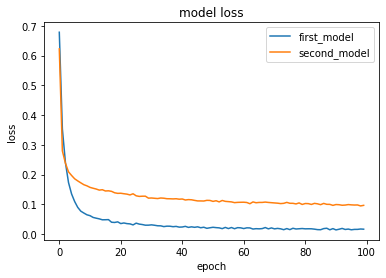

In [24]:
plt.plot(history2.history['loss'])
plt.plot(his.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['first_model', 'second_model'], loc='bottom left')
plt.show()

In can be seen that first_model converges faster than than the second_model

#### Comparing model Accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


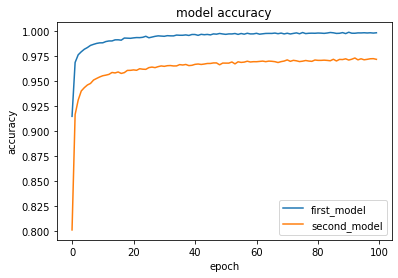

In [25]:
plt.plot(history2.history['accuracy'])
plt.plot(his.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['first_model', 'second_model'], loc='bottom left')
plt.show()

In can be seen that first_model has good performance in comparison to second_model

In [26]:
#Let's check it's performance on MNIST test DATA 
first_model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0556 - accuracy: 0.9910


[0.05557715520262718, 0.9909999966621399]

In [27]:
second_model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0370 - accuracy: 0.9892


[0.03698917478322983, 0.9891999959945679]

Performance on test data is descent.

***Saving Models***

In [28]:
second_model.save('second_modeltask2.h5') # saving weights

Modell = second_model.to_json()
#save the model architecture to JSON file
with open('second_modeltask2.json', 'w') as json_file:
    json_file.write(Modell)

In [29]:
first_model.save('first_modeltask2.h5') # saving weights

Modell = first_model.to_json()
#save the model architecture to JSON file
with open('first_modeltask2.json', 'w') as json_file:
    json_file.write(Modell)